In [78]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [79]:
data = pd.read_csv("creditcard.csv")
data.shape

(284807, 31)

In [80]:
rslt_df = data.loc[data['Class'] == 1]
print(rslt_df[:1])

      Time        V1        V2        V3        V4        V5        V6  \
541  406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   

           V7        V8        V9  ...       V21       V22       V23  \
541 -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   

          V24       V25      V26       V27       V28  Amount  Class  
541  0.320198  0.044519  0.17784  0.261145 -0.143276     0.0      1  

[1 rows x 31 columns]


In [81]:
rslt_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [82]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [83]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [84]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [85]:
data = data.dropna()
data.isnull().sum()
data.shape

(284807, 31)

In [86]:
fraud = data[data['Class'] == 1]
not_fraud = data[data['Class'] == 0]
print(len(fraud), len(not_fraud))

492 284315


In [87]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [88]:
not_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

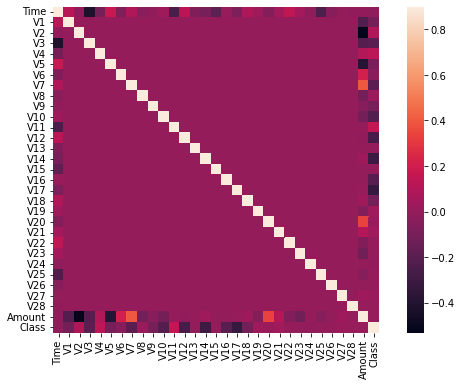

In [89]:
#correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (10,6))
sns.heatmap(corrmat, vmax= .9, square=True)
plt.show()

In [90]:
X = data.iloc[:, data.columns!='Class']
Y = data.iloc[:, data.columns=='Class']

In [91]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [92]:
Y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [93]:
print(X.shape, Y.shape)

(284807, 30) (284807, 1)


In [94]:
X_data = X.values
Y_data = Y.values

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, train_size=.7)
print(X_train.shape, X_val.shape)

(199364, 30) (85443, 30)


In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
yPred = rfc.predict(X_val)

<ipython-input-96-1ec8e129a676>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


In [97]:
import pickle
pickle.dump(rfc, open('RandomForestClassifier_model.json','wb'))

In [98]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_errors = (yPred != Y_val).sum()

# Y_val first, then predicetd values

accuracy = accuracy_score(yPred, Y_val)
print(accuracy)

precision = precision_score(Y_val, yPred)
print(precision)

recall = recall_score(Y_val, yPred)
print(recall)

f1_score = f1_score(Y_val, yPred)
print(f1_score)

matthewscoef = matthews_corrcoef(Y_val, yPred)
print(matthewscoef)


0.999602073897218
0.9186991869918699
0.8248175182481752
0.8692307692307693
0.8702985152633111


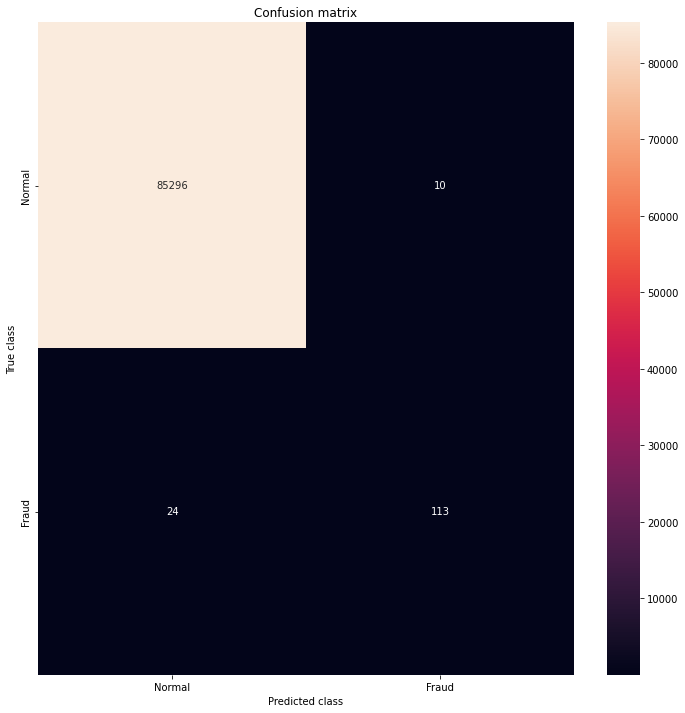

In [99]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_val, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");\
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [100]:
#nueural network version - might not work cause data is massively unbalanced

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(128, activation='relu'), #"""input_shape=([30])''',
                             tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
x_train_tensor = np.asarray(X_train).astype(np.float32)
y_train_tensor = np.asarray(Y_train).astype(np.float32)
x_val_tensor = np.asarray(X_val).astype(np.float32)
y_val_tensor = np.asarray(Y_val).astype(np.float32)
model.fit(X_train, Y_train,epochs=5,batch_size=100, validation_data=(X_val,Y_val))


Epoch 1/5
1994/1994 [==============================] - 4s 2ms/step - loss: 37.7781 - accuracy: 0.9926 - val_loss: 0.1097 - val_accuracy: 0.9958
Epoch 2/5
1994/1994 [==============================] - 3s 2ms/step - loss: 13.2440 - accuracy: 0.9961 - val_loss: 3.3632 - val_accuracy: 0.9982
Epoch 3/5
1994/1994 [==============================] - 3s 2ms/step - loss: 9.0869 - accuracy: 0.9956 - val_loss: 27.8363 - val_accuracy: 0.9984
Epoch 4/5
1994/1994 [==============================] - 4s 2ms/step - loss: 12.1169 - accuracy: 0.9966 - val_loss: 0.2300 - val_accuracy: 0.9920
Epoch 5/5
1994/1994 [==============================] - 3s 2ms/step - loss: 8.4684 - accuracy: 0.9960 - val_loss: 0.9946 - val_accuracy: 0.9983


In [101]:
model.save('tf_model.json')

In [102]:
from tensorflow.keras.models import load_model
new_model = load_model('tf_model.json')

In [103]:
yPred = new_model.predict(X_val)
np.where(yPred == max(yPred))

2671/2671 [==============================] - 3s 1ms/step


(array([ 1658,  7100,  8048,  8972, 10824, 11114, 12551, 12881, 13125,
        13220, 15965, 17336, 19701, 20898, 21108, 21385, 22641, 23360,
        23484, 25216, 25610, 25857, 26007, 26926, 27837, 29987, 32257,
        35972, 36824, 37039, 37047, 44753, 44828, 45578, 48425, 50117,
        50320, 51314, 52490, 53749, 53932, 54257, 55345, 59838, 61215,
        61511, 61543, 65258, 65578, 65923, 67966, 68761, 70480, 71659,
        72898, 73678, 73830, 75318, 76203, 76477, 78612, 80068, 80144,
        81373, 81926, 82225, 82734, 83231, 83873, 84233, 84729]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]))

In [104]:
X_val[50916]

array([ 4.06460000e+04, -1.17689760e+00,  1.23867462e+00,  2.25691335e+00,
        6.62896532e-01, -8.62182005e-01,  4.50617059e-01,  6.61595148e-02,
        2.96520801e-01, -2.26816352e-02, -1.13372820e-01, -8.81113096e-01,
        2.06968137e-01,  1.36819744e+00, -4.62953915e-01,  1.76137203e+00,
        5.24935303e-01, -6.77919843e-01,  8.99893550e-01,  2.68075100e-01,
        1.96463132e-01,  2.44122697e-01,  9.11383087e-01, -4.02904140e-01,
       -9.67348479e-02,  3.40112429e-01, -1.23941748e-01, -1.32137829e-01,
       -1.58732129e-01,  7.00000000e+01])

In [105]:
temp = [6.90000000e+01,  2.98503170e-01,  2.14272152e+00, -1.54214297e+00,
        1.56133191e+00,  9.38108025e-01, -2.14567270e+00,  1.40556857e+00,
       -7.78458743e-01,  3.28636441e-01,  1.27497138e-01,  1.61279907e+00,
       -9.63770304e-02,  6.54790271e-01, -4.31837786e+00,  1.03860349e+00,
        4.04686812e-01,  2.72916804e+00,  1.11586360e+00, -7.03814031e-01,
        6.76953714e-01, -2.90986927e-01, -2.34693934e-04,  9.21744203e-02,
        5.86205255e-01, -3.97313835e-01, -4.80948881e-01,  2.51145000e-01,
       -2.42278600e-01,  7.80000000e-01
]

q = new_model.predict( np.array( [temp,] )  )
print(q)

1/1 [==============================] - 0s 16ms/step
[[1.]]


In [106]:
r = pickle.load(open('RandomForestClassifier_model.json','rb'))

In [107]:
rfc = r.predict(np.array([temp]))

In [108]:
rfc[0]

0